In [1]:
#U.S. Real Estate Market Analysis December 2023

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action ='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
usmarket = pd.read_csv('C:/Users/avera/OneDrive/Desktop/BIA 652 Multivariate Data Analysis/Final Project/realtor data.csv')
usmarket

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1204061,for_sale,3.0,3.0,0.61,North Greenbush,New York,12198.0,1900.0,NaN,536250.0
1204062,for_sale,3.0,3.0,0.48,North Greenbush,New York,12198.0,2031.0,NaN,550000.0
1204063,for_sale,4.0,3.0,1.00,North Greenbush,New York,12198.0,2480.0,NaN,449900.0
1204064,for_sale,3.0,3.0,4.79,North Greenbush,New York,12198.0,2950.0,NaN,657850.0


In [4]:
usmarket_1 = usmarket.drop(['prev_sold_date'], axis = 1)
usmarket_1 = usmarket_1[usmarket_1['status'] == 'for_sale']
usmarket_1.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,65000.0


In [5]:
print(usmarket_1.shape)
usmarket_1.duplicated().sum()

(1202140, 9)


1067034

In [6]:
usmarket_1.drop_duplicates(inplace=True)
usmarket_1.shape

(135106, 9)

In [7]:
pd.isna(usmarket_1).sum()

status            0
bed           20251
bath          18245
acre_lot      35253
city             24
state             0
zip_code         39
house_size    44457
price             2
dtype: int64

In [8]:
grouped = usmarket_1.groupby('state')
median_values = grouped[['bed', 'bath']].transform('median')
average_values = grouped[['acre_lot', 'house_size', 'price']].transform('mean')

#I decided that median was appropriate for bed and bath as you cannot have a float value for them, while average was better for variables for house size, acre_lot, & price
usmarket_1['bed'] = usmarket_1['bed'].fillna(median_values['bed'])
usmarket_1['bath'] = usmarket_1['bath'].fillna(median_values['bath'])
usmarket_1['acre_lot'] = usmarket_1['acre_lot'].fillna(average_values['acre_lot'])
usmarket_1['house_size'] = usmarket_1['house_size'].fillna(average_values['house_size'])
usmarket_1['price'] = usmarket_1['price'].fillna(average_values['price'])

In [9]:
pd.isna(usmarket_1).sum()

status         0
bed            9
bath           9
acre_lot       1
city          24
state          0
zip_code      39
house_size     9
price          0
dtype: int64

In [10]:
usmarket_1.dropna(inplace=True)
pd.isna(usmarket_1).sum()

status        0
bed           0
bath          0
acre_lot      0
city          0
state         0
zip_code      0
house_size    0
price         0
dtype: int64

In [11]:
usmarket_1.describe()  #Looks  like we have outliers by looking at our mins and max, and an inflated average

,bed,bath,acre_lot,zip_code,house_size,price
count,135051.000000,135051.000000,135051.000000,135051.000000,1.350510e+05,1.350510e+05
mean,3.312223,2.465080,31.262803,8873.957653,2.197347e+03,9.290847e+05
std,1.749615,1.634411,1039.988483,4385.007796,4.579656e+03,3.270530e+06
min,1.000000,1.000000,0.000000,601.000000,4.000000e+00,0.000000e+00
25%,2.000000,2.000000,0.150000,6455.000000,1.397000e+03,2.590000e+05
50%,3.000000,2.000000,0.650000,8701.000000,2.093865e+03,4.690000e+05
75%,4.000000,3.000000,21.554909,11365.000000,2.332517e+03,8.388940e+05
max,123.000000,198.000000,100000.000000,99999.000000,1.450112e+06,8.750000e+08


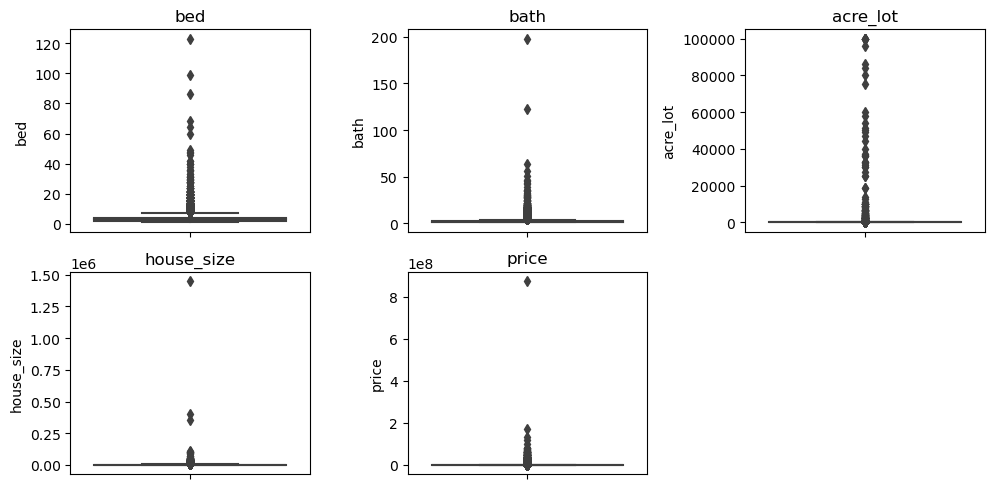

In [12]:
numeric_columns=['bed','bath','acre_lot', 'house_size','price']  #zip_code is irrelevant here

plt.figure(figsize=(10,5))
for i, col in enumerate(numeric_columns):
    plt.subplot(2,3, i+1)   #helps us set up multiple subplots in the order of our specified variables!
    sns.boxplot(data=usmarket_1, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [13]:
# Calculating the first quartile (Q1) and third quartile (Q3) for the specified columns
Q1 = usmarket_1[numeric_columns].quantile(0.25)
Q3 = usmarket_1[numeric_columns].quantile(0.75)

IQR = Q3 - Q1

# Defining our lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replacing outliers with the median for each column
for col in numeric_columns:
    outliers_mask = (usmarket_1[col] < lower_bound[col]) | (usmarket_1[col] > upper_bound[col])
    median_value = usmarket_1[col].median()
    usmarket_1.loc[outliers_mask, col] = median_value

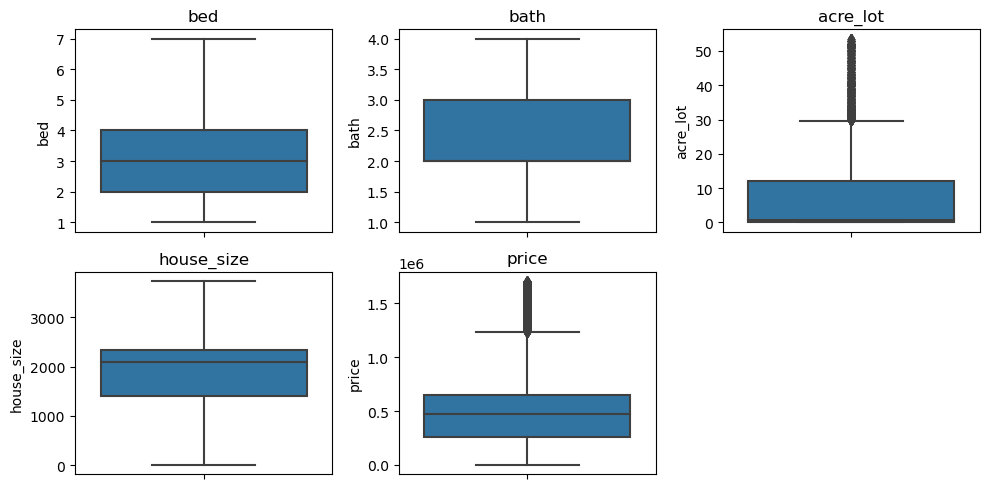

In [14]:
plt.figure(figsize=(10,5))
for i, col in enumerate(numeric_columns):
    plt.subplot(2,3, i+1)
    sns.boxplot(data=usmarket_1, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

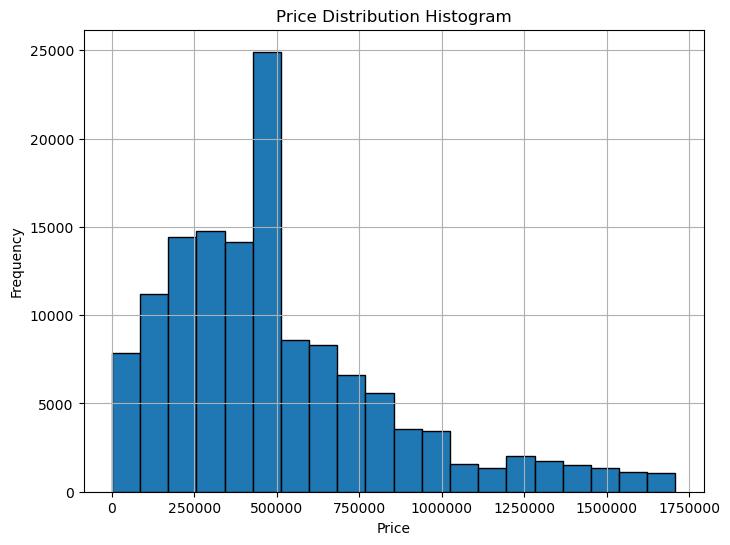

In [15]:
# Creating a hist
plt.figure(figsize=(8, 6))
plt.hist(usmarket_1['price'], bins=20, edgecolor='black')  
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution Histogram')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True)

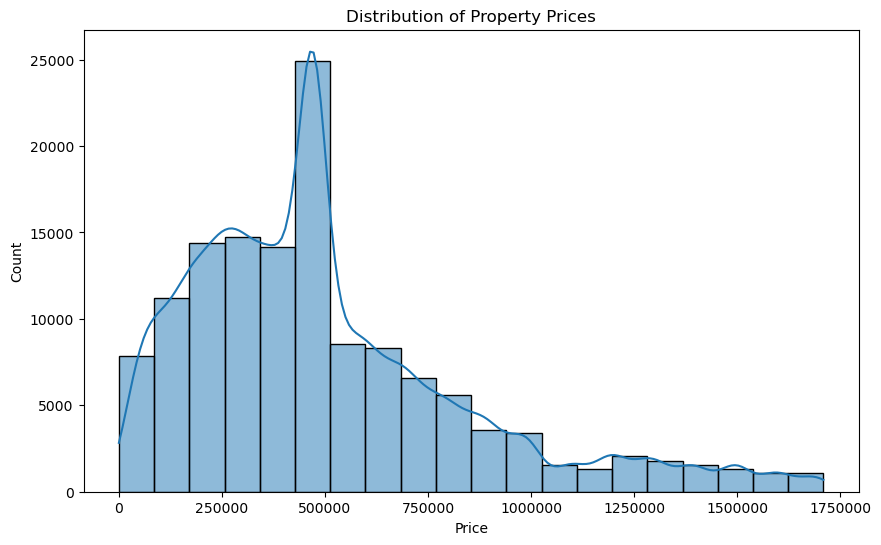

In [16]:
# Secondary Graph for Same Display but better visual 
plt.figure(figsize=(10,6))
sns.histplot(usmarket_1['price'], bins=20, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [17]:
#Engineering useful variables
usmarket_1['price_per_sqft'] = round(usmarket_1['price']/usmarket_1['house_size'])
usmarket_1['price_per_bed'] = round(usmarket_1['price']/usmarket_1['bed'])
usmarket_1['price_per_bath'] = round(usmarket_1['price']/usmarket_1['bath'])
usmarket_1

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price,price_per_sqft,price_per_bed,price_per_bath
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.000000,105000.0,114.0,35000.0,52500.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.000000,80000.0,52.0,20000.0,40000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.000000,67000.0,90.0,33500.0,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.000000,145000.0,81.0,36250.0,72500.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,2807.719635,65000.0,23.0,10833.0,32500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1202543,for_sale,5.0,2.0,0.10,Kingston,New York,12401.0,2414.000000,299900.0,124.0,59980.0,149950.0
1203762,for_sale,3.0,1.0,0.16,Pittsfield,Massachusetts,1201.0,1055.000000,236000.0,224.0,78667.0,236000.0
1203844,for_sale,3.0,2.0,10.77,Westerlo,New York,12193.0,2093.864616,60000.0,29.0,20000.0,30000.0
1203847,for_sale,3.0,2.0,5.90,Berne,New York,12193.0,2093.864616,35000.0,17.0,11667.0,17500.0


In [18]:
avg_price_per_state = usmarket_1.groupby('state')['price'].mean().reset_index()
avg_price_per_state.columns = ['state', 'avg_price_per_state']

usmarket_1 = pd.merge(usmarket_1, avg_price_per_state, on='state', how='left')

usmarket_1['avg_price_per_state'] = usmarket_1['avg_price_per_state'].round() 
usmarket_1

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price,price_per_sqft,price_per_bed,price_per_bath,avg_price_per_state
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.000000,105000.0,114.0,35000.0,52500.0,298082.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.000000,80000.0,52.0,20000.0,40000.0,298082.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.000000,67000.0,90.0,33500.0,67000.0,298082.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.000000,145000.0,81.0,36250.0,72500.0,298082.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,2807.719635,65000.0,23.0,10833.0,32500.0,298082.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135046,for_sale,5.0,2.0,0.10,Kingston,New York,12401.0,2414.000000,299900.0,124.0,59980.0,149950.0,605953.0
135047,for_sale,3.0,1.0,0.16,Pittsfield,Massachusetts,1201.0,1055.000000,236000.0,224.0,78667.0,236000.0,571031.0
135048,for_sale,3.0,2.0,10.77,Westerlo,New York,12193.0,2093.864616,60000.0,29.0,20000.0,30000.0,605953.0
135049,for_sale,3.0,2.0,5.90,Berne,New York,12193.0,2093.864616,35000.0,17.0,11667.0,17500.0,605953.0


In [19]:
avg_price_sqft__by_state = usmarket_1.groupby('state')['price_per_sqft'].mean().reset_index()
avg_price_sqft__by_state.columns = ['state', 'avg_price_sqft__by_state']

usmarket_1 = pd.merge(usmarket_1, avg_price_sqft__by_state, on='state', how='left')

usmarket_1['avg_price_sqft__by_state'] = usmarket_1['avg_price_sqft__by_state'].round() 
usmarket_1

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price,price_per_sqft,price_per_bed,price_per_bath,avg_price_per_state,avg_price_sqft__by_state
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.000000,105000.0,114.0,35000.0,52500.0,298082.0,163.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.000000,80000.0,52.0,20000.0,40000.0,298082.0,163.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.000000,67000.0,90.0,33500.0,67000.0,298082.0,163.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.000000,145000.0,81.0,36250.0,72500.0,298082.0,163.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,2807.719635,65000.0,23.0,10833.0,32500.0,298082.0,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135046,for_sale,5.0,2.0,0.10,Kingston,New York,12401.0,2414.000000,299900.0,124.0,59980.0,149950.0,605953.0,396.0
135047,for_sale,3.0,1.0,0.16,Pittsfield,Massachusetts,1201.0,1055.000000,236000.0,224.0,78667.0,236000.0,571031.0,350.0
135048,for_sale,3.0,2.0,10.77,Westerlo,New York,12193.0,2093.864616,60000.0,29.0,20000.0,30000.0,605953.0,396.0
135049,for_sale,3.0,2.0,5.90,Berne,New York,12193.0,2093.864616,35000.0,17.0,11667.0,17500.0,605953.0,396.0


In [20]:
avg_price_by_state = usmarket_1.groupby('state')['avg_price_per_state'].mean().reset_index()

sorted_states = avg_price_by_state.sort_values('avg_price_per_state', ascending=False)

#what are the top 10 most expensive states
top_10_expensive_states = sorted_states.head(10)

print(top_10_expensive_states)

             state  avg_price_per_state
7         New York             605953.0
4    Massachusetts             571031.0
14         Wyoming             535000.0
6       New Jersey             484098.0
10    Rhode Island             458727.0
2          Georgia             434753.0
0      Connecticut             418767.0
5    New Hampshire             395789.0
12  Virgin Islands             369353.0
8     Pennsylvania             368516.0


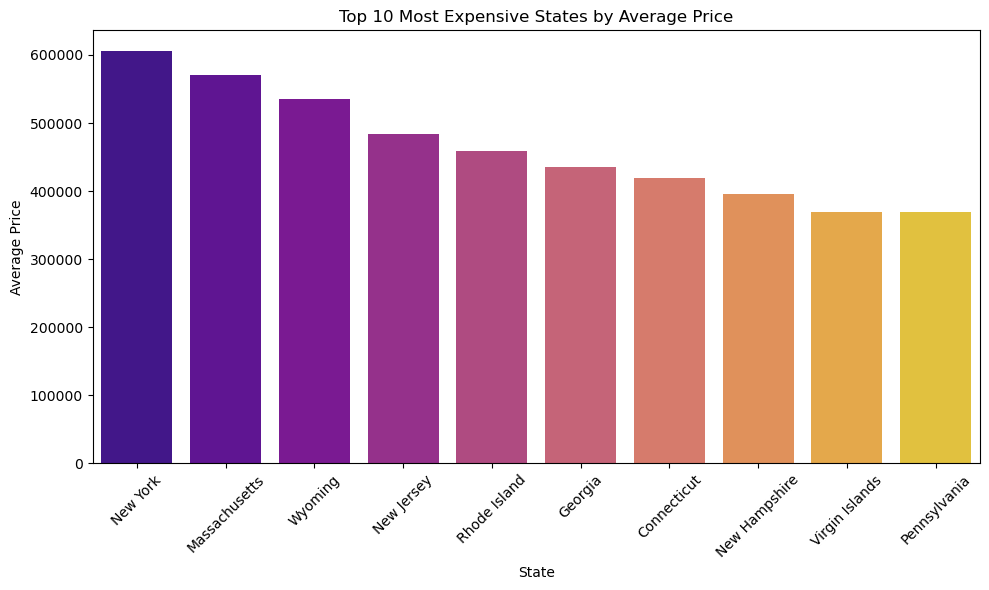

In [21]:
# Plotting the top 10 most expensive states
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='avg_price_per_state', data=top_10_expensive_states, palette='plasma')
plt.title('Top 10 Most Expensive States by Average Price')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()

In [22]:
avg_price_sqft__by_state = usmarket_1.groupby('state')['avg_price_sqft__by_state'].mean().reset_index()

sorted_states1 = avg_price_sqft__by_state.sort_values('avg_price_sqft__by_state', ascending=False)

top_10_expensive_states_by_sqft = sorted_states1.head(10)

print(top_10_expensive_states_by_sqft)

             state  avg_price_sqft__by_state
7         New York                     396.0
4    Massachusetts                     350.0
14         Wyoming                     276.0
10    Rhode Island                     269.0
6       New Jersey                     241.0
0      Connecticut                     226.0
8     Pennsylvania                     223.0
5    New Hampshire                     207.0
1         Delaware                     184.0
12  Virgin Islands                     182.0


In [23]:
states = usmarket_1.copy()
states_status = usmarket_1.groupby('state')['status'].count().nlargest(10).reset_index()
print(states_status)

           state  status
0       New York   51525
1     New Jersey   32163
2    Connecticut   13712
3  Massachusetts    9989
4   Pennsylvania    8876
5          Maine    4936
6  New Hampshire    3424
7   Rhode Island    3329
8    Puerto Rico    2634
9        Vermont    2481


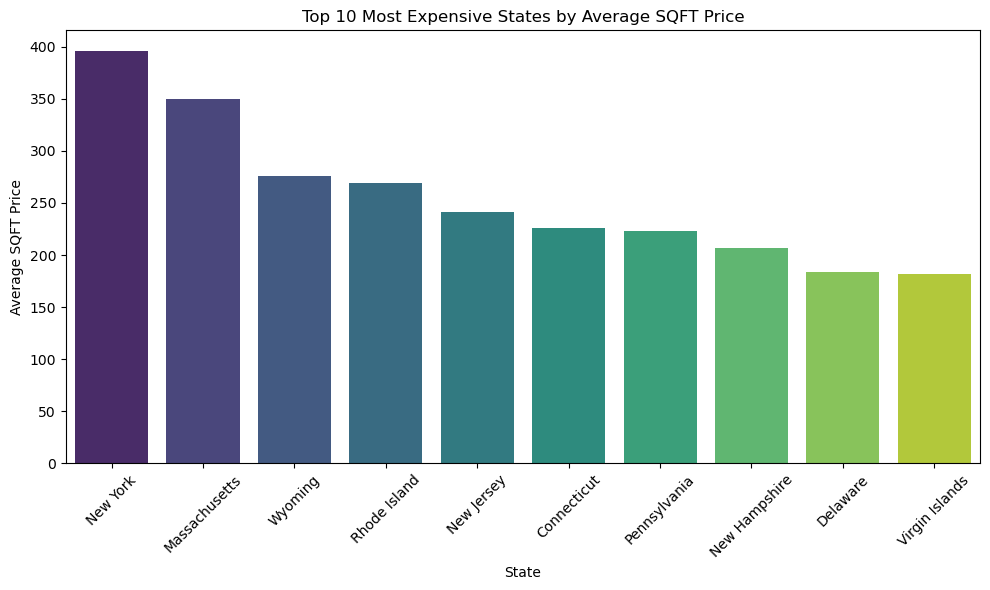

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='avg_price_sqft__by_state', data=top_10_expensive_states_by_sqft, palette='viridis')
plt.title('Top 10 Most Expensive States by Average SQFT Price')
plt.xlabel('State')
plt.ylabel('Average SQFT Price')
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

In [25]:
national_average = usmarket_1['price'].mean()
round(national_average)

504387

In [26]:
#Since New York, New Jersey, Connecticut have the most data and all constitute the tri-state area I will shift my focus to them
tri_state_list = ['New Jersey', 'New York', 'Connecticut']

# Filtering the main DataFrame to include only data for these three states
tri_state = usmarket_1.loc[usmarket_1['state'].isin(tri_state_list)]
tri_state

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price,price_per_sqft,price_per_bed,price_per_bath,avg_price_per_state,avg_price_sqft__by_state
3812,for_sale,3.0,1.0,3.930000,Willington,Connecticut,6279.0,1572.000000,225000.0,143.0,75000.0,225000.0,418767.0,226.0
3813,for_sale,4.0,3.0,2.340000,Coventry,Connecticut,6238.0,3320.000000,579900.0,175.0,144975.0,193300.0,418767.0,226.0
3814,for_sale,1.0,1.0,32.467090,Willington,Connecticut,6279.0,680.000000,65000.0,96.0,65000.0,65000.0,418767.0,226.0
3816,for_sale,2.0,1.0,0.910000,East Windsor,Connecticut,6016.0,960.000000,215000.0,224.0,107500.0,215000.0,418767.0,226.0
3818,for_sale,2.0,1.0,0.360000,Vernon,Connecticut,6066.0,860.000000,144900.0,168.0,72450.0,144900.0,418767.0,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135045,for_sale,3.0,2.0,51.559744,Red Hook,New York,12571.0,1440.000000,165000.0,115.0,55000.0,82500.0,605953.0,396.0
135046,for_sale,5.0,2.0,0.100000,Kingston,New York,12401.0,2414.000000,299900.0,124.0,59980.0,149950.0,605953.0,396.0
135048,for_sale,3.0,2.0,10.770000,Westerlo,New York,12193.0,2093.864616,60000.0,29.0,20000.0,30000.0,605953.0,396.0
135049,for_sale,3.0,2.0,5.900000,Berne,New York,12193.0,2093.864616,35000.0,17.0,11667.0,17500.0,605953.0,396.0


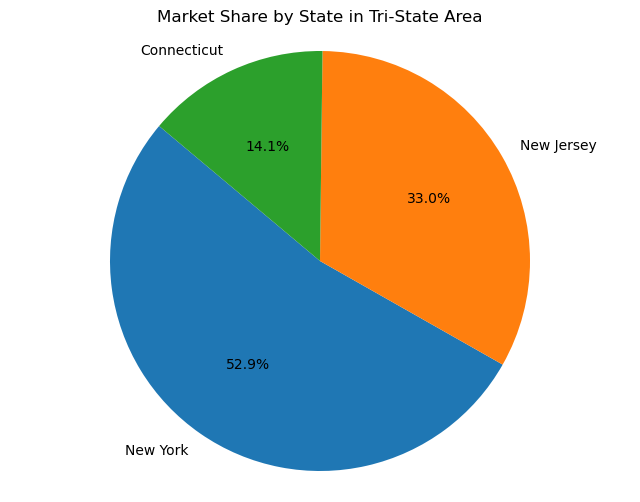

In [27]:
state_counts = tri_state['state'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Share by State in Tri-State Area')
plt.axis('equal')  
plt.show()

In [28]:
numeric_columns = ['bed', 'bath', 'acre_lot', 'house_size', 'zip_code', 'price',]

# Computing the correlation matrix for int columns
correlation_matrix = tri_state[numeric_columns].corr()
correlation_matrix

,bed,bath,acre_lot,house_size,zip_code,price
bed,1.000000,0.497653,-0.448190,0.490721,-0.056276,0.176292
bath,0.497653,1.000000,-0.287186,0.502230,-0.091223,0.279597
acre_lot,-0.448190,-0.287186,1.000000,-0.311020,0.208448,0.076217
house_size,0.490721,0.502230,-0.311020,1.000000,-0.090035,0.162064
zip_code,-0.056276,-0.091223,0.208448,-0.090035,1.000000,0.120632
price,0.176292,0.279597,0.076217,0.162064,0.120632,1.000000


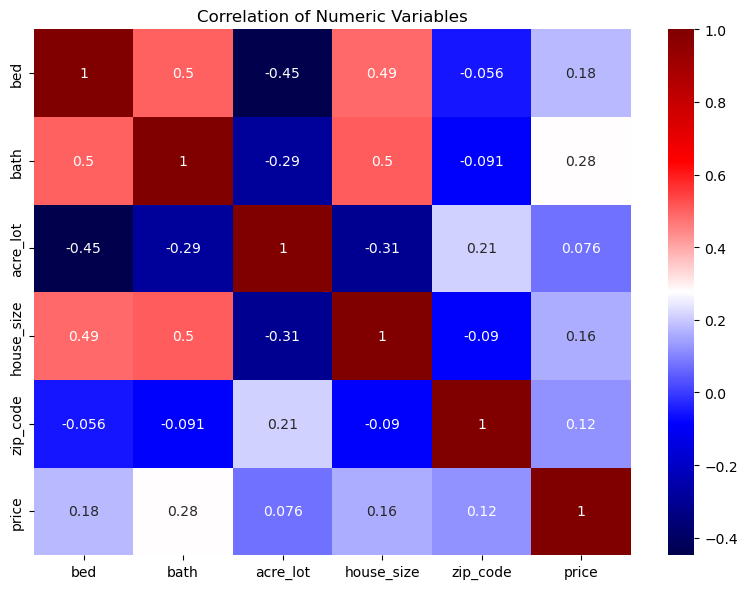

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic')
plt.title('Correlation of Numeric Variables')
plt.tight_layout()
plt.show()

In [30]:
model_1 = smf.ols(formula='price ~ bed + bath', data=tri_state)
res = model_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     4235.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:46:16   Log-Likelihood:            -1.3774e+06
No. Observations:               97400   AIC:                         2.755e+06
Df Residuals:                   97397   BIC:                         2.755e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.737e+05   3258.924     83.992      0.000    2.67e+05     2.8e+05
bed         1.341e+04    962.145     13.936      0.000    1.15e+04    1.53e+04
bath        1.029e+05   1429.696     71.973      0.000       1e+05    1.06e+05
==============================================================================
Omnibus:                    20047.124   Durbin-Watson:                   1.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37009.793
Skew:                           1.297   Prob(JB):                         0.00
Kurtosis:                       4.548   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model_2 = smf.ols(formula='price ~ bed + bath + house_size + zip_code', data=tri_state)
res2 = model_2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     2768.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:46:16   Log-Likelihood:            -1.3762e+06
No. Observations:               97400   AIC:                         2.752e+06
Df Residuals:                   97395   BIC:                         2.753e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.447e+04   6343.784      2.281      0.023    2033.476    2.69e+04
bed         1.194e+04   1003.677     11.899      0.000    9976.032    1.39e+04
bath        1.047e+05   1504.766     69.568      0.000    1.02e+05    1.08e+05
house_size    12.9298      2.035      6.353      0.000       8.941      16.919
zip_code      24.7868      0.508     48.769      0.000      23.791      25.783
==============================================================================
Omnibus:                    19777.890   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37936.663
Skew:                           1.249   Prob(JB):                         0.00
Kurtosis:                       4.762   Cond. No.                     5.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\avera\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


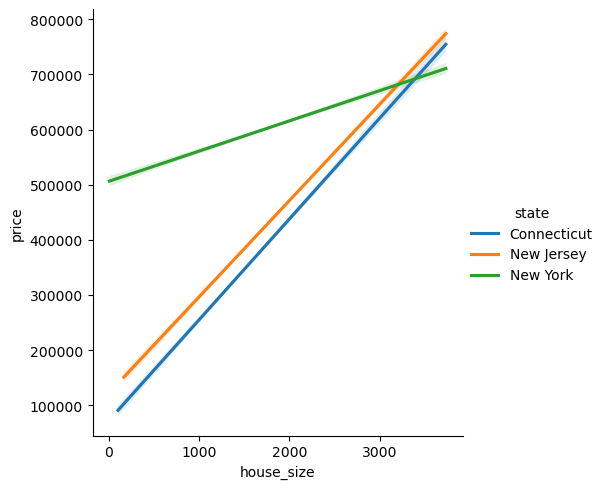

In [32]:
sns.lmplot(x='house_size', y='price', hue='state', data=tri_state.loc[tri_state['state'].isin(tri_state_list)], legend=True, scatter=False)
plt.show()

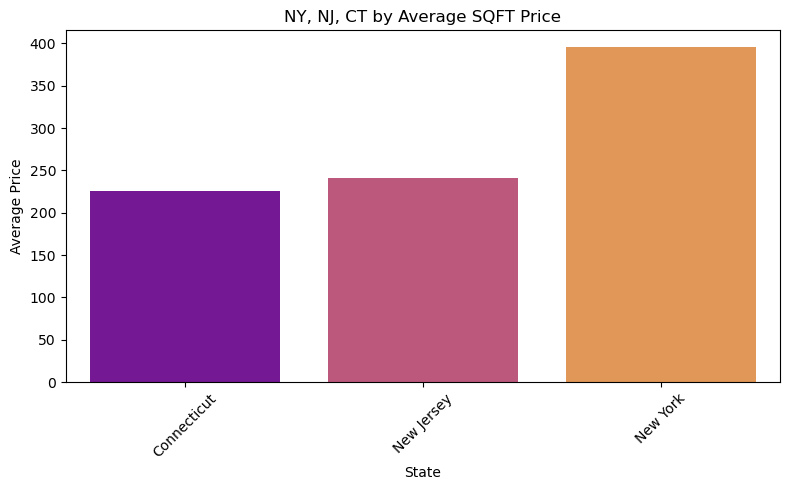

In [33]:
sqft_price_tri_state = tri_state.groupby('state')['price_per_sqft'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='state', y='price_per_sqft', data=sqft_price_tri_state, palette='plasma')
plt.title('NY, NJ, CT by Average SQFT Price')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

In [34]:
ct_data = tri_state[tri_state['state'] == 'Connecticut']

ct_avg_sqft_prices = ct_data.groupby('zip_code')['price_per_sqft'].mean().reset_index()


ct_sorted_by_sqft_exp = ct_avg_sqft_prices.sort_values(by='price_per_sqft', ascending=False)
ct_sorted_by_sqft_exp.head()

,zip_code,price_per_sqft
218,6763.0,544.650000
255,6870.0,453.038462
252,6853.0,420.421053
249,6840.0,419.702857
239,6807.0,417.833333


In [43]:
print(ct_sorted_by_sqft_exp.median()) 
print(f"The most expensive region to own property in CT by sqft is Morris,CT and the median is Clinton,CT")

zip_code          6413.50000
price_per_sqft     197.76601
dtype: float64
The most expensive region to own property in CT by sqft is Morris,CT and the median is Clinton,CT


In [36]:
nj_data = tri_state[tri_state['state'] == 'New Jersey']

nj_avg_sqft_prices = nj_data.groupby('zip_code')['price_per_sqft'].mean().reset_index()

nj_sorted_by_sqft_exp = nj_avg_sqft_prices.sort_values(by='price_per_sqft', ascending=False)
nj_sorted_by_sqft_exp.head()

,zip_code,price_per_sqft
103,7310.0,877.818182
98,7302.0,717.468208
25,7030.0,613.280702
510,8735.0,500.708333
474,8542.0,498.000000


In [44]:
print(nj_sorted_by_sqft_exp.median()) 
print(f"The most expensive region to own property in NJ by sqft is Jersey City,NJ and the median is Stirling,NJ")

zip_code          7980.500000
price_per_sqft     221.266393
dtype: float64
The most expensive region to own property in NJ by sqft is Jersey City,NJ and the median is Stirling,NJ


In [38]:
ny_data = tri_state[tri_state['state'] == 'New York']

ny_avg_sqft_prices = ny_data.groupby('zip_code')['price_per_sqft'].mean().reset_index()

ny_sorted_by_sqft_exp = ny_avg_sqft_prices.sort_values(by='price_per_sqft', ascending=False)
ny_sorted_by_sqft_exp.head()

,zip_code,price_per_sqft
460,11948.0,17044.857143
707,12504.0,1250.000000
272,11243.0,1212.666667
228,11101.0,1170.105128
46,10280.0,927.235955


In [46]:
print(ny_sorted_by_sqft_exp.median())
print(f"The most expensive region to own property in NY by sqft is Laurel,NY and the median is EastPort,NY")

zip_code          11941.000000
price_per_sqft      266.244681
dtype: float64
The most expensive region to own property in NY by sqft is Laurel,NY and the median is EastPort,NY


In [47]:
#Creating our the ideal input for our model
nat_avgprice = round(usmarket_1['price'].mean())
nat_avgbed = round(usmarket_1['bed'].mean())
nat_avgbath = round(usmarket_1['bath'].mean())
nat_avgsqft = round(usmarket_1['house_size'].mean())
print(f" The national average home price is {nat_avgprice}, # of bed is {nat_avgbed}, # of baths is {nat_avgbath}, & sqft is {nat_avgsqft}")

 The national average home price is 504387, # of bed is 3, # of baths is 2, & sqft is 1898


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

features = ['bed', 'bath', 'zip_code', 'house_size']
target = 'price'
X = tri_state[features]
y = tri_state[target]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

lr = LinearRegression()

# Training the model using our training data
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

In [49]:
#Trying to see its accuracy
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.09015702965830663
Mean Squared Error: 109206240161.23755


In [51]:
# Connecticut Iteration
bedrooms = float(input("Enter the number of bedrooms: "))
bathrooms = float(input("Enter the number of bathrooms: "))
area = float(input("Enter the zip code: "))
SQFT = float(input("Enter the house size in square feet: "))

client_input = pd.DataFrame({'bed': [bedrooms], 'bath': [bathrooms], 'zip_code': [area], 'house_size': [SQFT]})

# Predicting the price based on input variables
predicted_price = lr.predict(client_input)

print(f"The predicted price for a property using national average home specifications in CT is: ${predicted_price[0]:,.2f}")

Enter the number of bedrooms:  3
Enter the number of bathrooms:  2
Enter the zip code:  6413
Enter the house size in square feet:  1898


The predicted price for a property using national average home specifications in CT is: $437,487.49


In [52]:
# New Jersey Iteration
bedrooms = float(input("Enter the number of bedrooms: "))
bathrooms = float(input("Enter the number of bathrooms: "))
area = float(input("Enter the zip code: "))
SQFT = float(input("Enter the house size in square feet: "))

client_input = pd.DataFrame({'bed': [bedrooms], 'bath': [bathrooms], 'zip_code': [area], 'house_size': [SQFT]})

predicted_price = lr.predict(client_input)

print(f"The predicted price for a property using national average home specifications in NJ is: ${predicted_price[0]:,.2f}")

Enter the number of bedrooms:  3
Enter the number of bathrooms:  2
Enter the zip code:  7980
Enter the house size in square feet:  1898


The predicted price for a property using national average home specifications in NJ is: $479,285.57


In [54]:
# New York Iteration
bedrooms = float(input("Enter the number of bedrooms: "))
bathrooms = float(input("Enter the number of bathrooms: "))
area = float(input("Enter the zip code: "))
SQFT = float(input("Enter the house size in square feet: "))

client_input = pd.DataFrame({'bed': [bedrooms], 'bath': [bathrooms], 'zip_code': [area], 'house_size': [SQFT]})

predicted_price = lr.predict(client_input)

print(f"The predicted price for a property using national average home specifications in NY is: ${predicted_price[0]:,.2f}")

Enter the number of bedrooms:  3
Enter the number of bathrooms:  2
Enter the zip code:  11941
Enter the house size in square feet:  11941


The predicted price for a property using national average home specifications in NY is: $723,694.98


In [ ]:
# Please see slideshow for final conclusions of our analysis!